# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [6]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

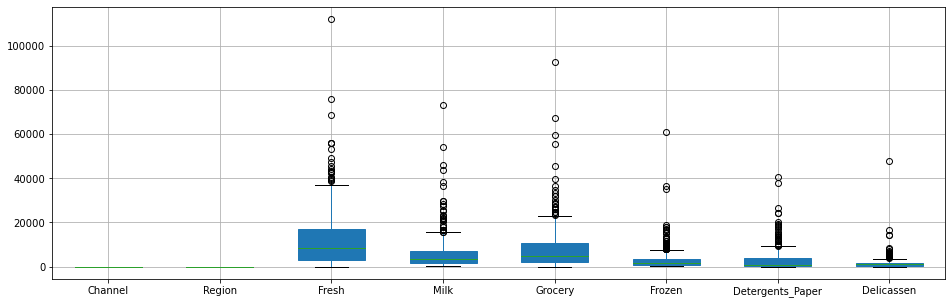

In [8]:
customers.boxplot(widths = 0.6, patch_artist = True,figsize = (16, 5))

In [9]:
#1.What does each column mean? R= Different kind of porducts
#2.Any categorical data to convert? R= I would choose Channel and Region.
#3.Any missing data to remove? R= It doesn't have any missing data.
#4.Column collinearity - any high correlations? R= Grocery ans Detergents_Paper seem to be #5.highly correlated.
#6.Descriptive statistics - any outliers to remove? R= I think every column after channel and region need outliers to be removed.
#7.Column-wise data distribution - is the distribution skewed? R=yes
#Etc.


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [10]:
# Your code here
customers['Channel'] = customers['Channel'].astype('category')
customers['Region'] = customers['Region'].astype('category')

In [11]:
customers.dtypes

Channel             category
Region              category
Fresh                  int64
Milk                   int64
Grocery                int64
Frozen                 int64
Detergents_Paper       int64
Delicassen             int64
dtype: object

In [34]:
q1 = customers[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].quantile(0.02)
q3 = customers[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].quantile(0.99)
customers_clean = customers[(customers[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]> q1) & (customers[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']] < q3)]


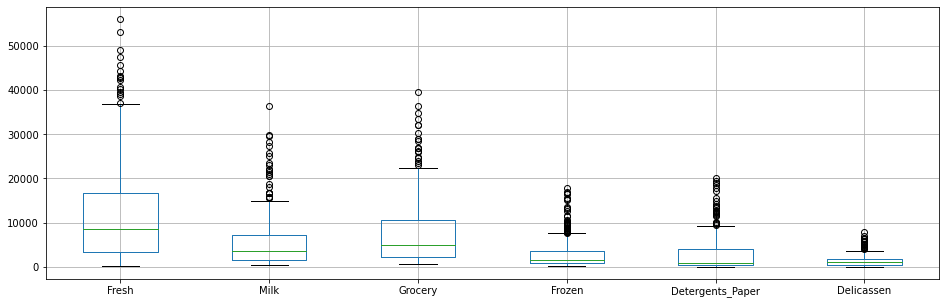

In [35]:
customers_clean.boxplot(figsize = (16, 5))

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [36]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
customers_scale = sscaler.fit_transform(customers_clean)
customers_scale = pd.DataFrame(customers_scale, columns = customers.columns)
customers_scale['Channel'] = customers['Channel']
customers_scale['Region'] = customers['Region']
customers_scale.head()

/Users/joel/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:770: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/joel/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:711: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.108175,0.789985,0.015014,-0.808141,0.016268,0.001761
1,2,3,-0.423042,0.818441,0.294798,-0.319636,0.185222,0.344837
2,2,3,-0.489681,0.633295,0.032161,-0.116724,0.246088,5.097763
3,1,3,0.164591,-0.773225,-0.450595,1.145245,-0.575204,0.354236
4,2,3,1.049637,0.005424,-0.035589,0.359788,-0.228563,3.015029


In [48]:
customerss=customers_scale.dropna()

In [49]:
customerss.reset_index(drop=True)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.108175,0.789985,0.015014,-0.808141,0.016268,0.001761
1,2,3,-0.423042,0.818441,0.294798,-0.319636,0.185222,0.344837
2,2,3,-0.489681,0.633295,0.032161,-0.116724,0.246088,5.097763
3,1,3,0.164591,-0.773225,-0.450595,1.145245,-0.575204,0.354236
4,2,3,1.049637,0.005424,-0.035589,0.359788,-0.228563,3.015029
...,...,...,...,...,...,...,...,...
376,1,3,0.492673,-0.269524,0.075376,-0.658560,-0.066434,-0.389877
377,1,3,1.720568,1.232525,1.195208,3.269354,-0.663911,0.680079
378,1,3,2.622179,-0.729803,-0.932514,0.547553,-0.688203,0.791305
379,2,3,0.284427,1.867602,3.176975,-0.737768,3.337193,0.416115


In [50]:
customerss.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [51]:
# Your code here:
from sklearn.cluster import KMeans
customers_km = KMeans(n_clusters = 4).fit(customerss)
customerss['KM_labels'] = customers_km.labels_
customerss.head()

<ipython-input-51-8813f6ff5e71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customerss['KM_labels'] = customers_km.labels_


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KM_labels
0,2,3,0.108175,0.789985,0.015014,-0.808141,0.016268,0.001761,3
1,2,3,-0.423042,0.818441,0.294798,-0.319636,0.185222,0.344837,3
2,2,3,-0.489681,0.633295,0.032161,-0.116724,0.246088,5.097763,3
3,1,3,0.164591,-0.773225,-0.450595,1.145245,-0.575204,0.354236,2
4,2,3,1.049637,0.005424,-0.035589,0.359788,-0.228563,3.015029,2


Count the values in `labels`.

In [52]:
# Your code here:
customerss['KM_labels'].value_counts()

0    180
3     99
2     71
1     31
Name: KM_labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [53]:
# Your code here
cus_fin = customerss.copy()
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5).fit(cus_fin)
cus_fin['DBSCAN_labels'] = dbscan.labels_
cus_fin.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KM_labels,DBSCAN_labels
0,2,3,0.108175,0.789985,0.015014,-0.808141,0.016268,0.001761,3,-1
1,2,3,-0.423042,0.818441,0.294798,-0.319636,0.185222,0.344837,3,-1
2,2,3,-0.489681,0.633295,0.032161,-0.116724,0.246088,5.097763,3,-1
3,1,3,0.164591,-0.773225,-0.450595,1.145245,-0.575204,0.354236,2,-1
4,2,3,1.049637,0.005424,-0.035589,0.359788,-0.228563,3.015029,2,-1


Count the values in `labels_DBSCAN`.

In [54]:
# Your code here
cus_fin['DBSCAN_labels'].value_counts()

-1    299
 0     67
 1      8
 2      7
Name: DBSCAN_labels, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

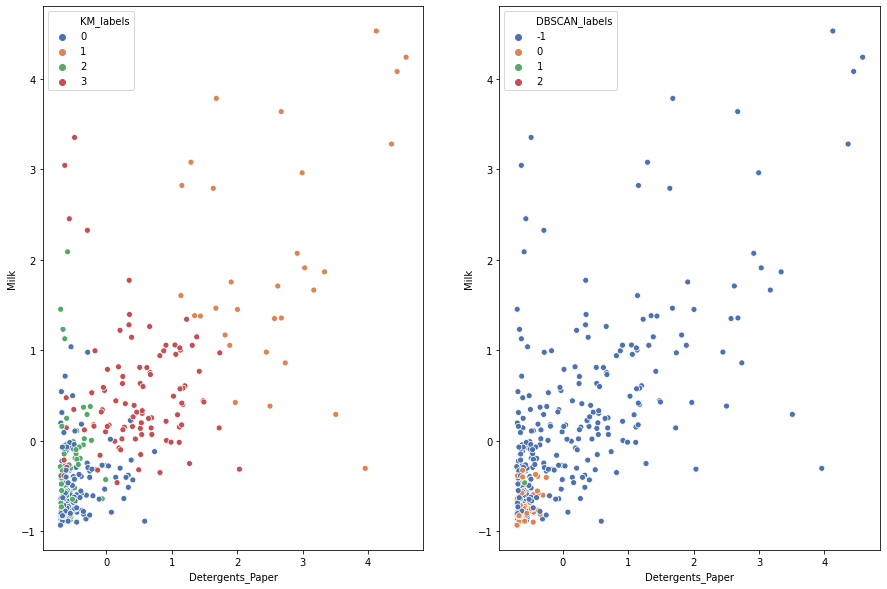

In [56]:
# Your code here:

import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10), nrows=1, ncols=2)

plt.sca(ax[0])
sns.scatterplot(data=cus_fin, x='Detergents_Paper', y='Milk', hue='KM_labels',palette='deep')

plt.sca(ax[1])
sns.scatterplot(data=cus_fin, x='Detergents_Paper', y='Milk', hue='DBSCAN_labels',palette='deep')
plt.show();

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

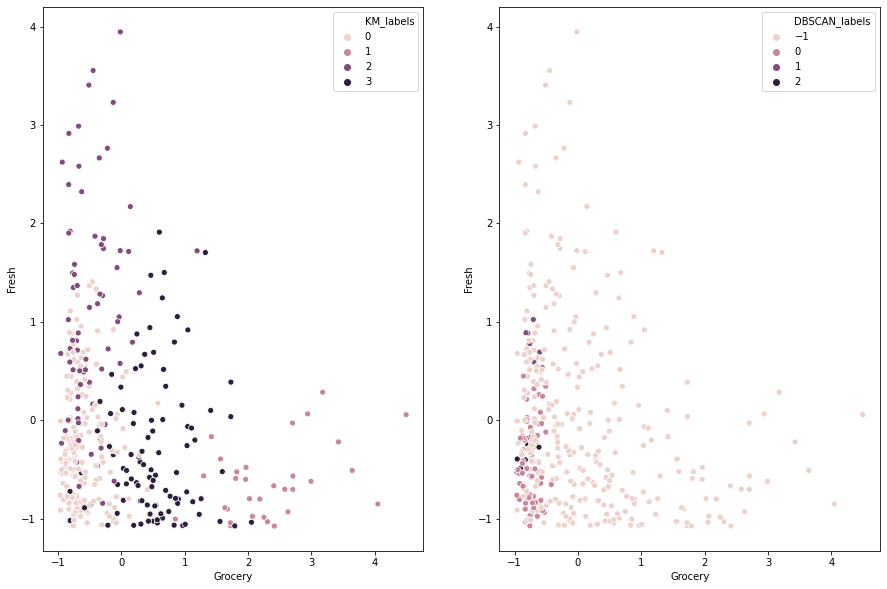

In [57]:
# Your code here:
fig, ax = plt.subplots(figsize=(15,10), nrows=1, ncols=2)

plt.sca(ax[0])
sns.scatterplot(data=cus_fin, x='Grocery', y='Fresh', hue='KM_labels')

plt.sca(ax[1])
sns.scatterplot(data=cus_fin, x='Grocery', y='Fresh', hue='DBSCAN_labels')
plt.show();

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

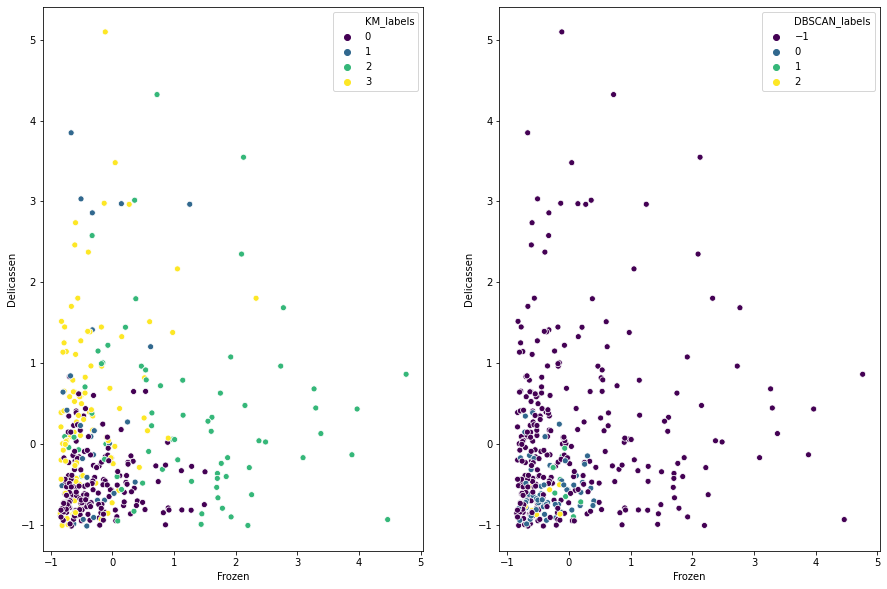

In [58]:
# Your code here:
fig, ax = plt.subplots(figsize=(15,10), nrows=1, ncols=2)

plt.sca(ax[0])
sns.scatterplot(data=cus_fin, x='Frozen', y='Delicassen', hue='KM_labels',palette='viridis')

plt.sca(ax[1])
sns.scatterplot(data=cus_fin, x='Frozen', y='Delicassen', hue='DBSCAN_labels',palette='viridis')
plt.show();

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [59]:
# Your code here:
cus_fin.groupby(['KM_labels']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,DBSCAN_labels
KM_labels,,,,,,,
0,-0.272969,-0.548381,-0.598464,-0.274282,-0.497501,-0.482408,-0.422222
1,-0.622503,1.969510,2.359465,-0.296590,2.568500,0.377406,-1.000000
2,1.117186,-0.297066,-0.471676,1.269113,-0.543404,0.331091,-1.000000
3,-0.299105,0.498396,0.503904,-0.376248,0.469490,0.433822,-1.000000


In [61]:
cus_fin.groupby(['DBSCAN_labels']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KM_labels
DBSCAN_labels,,,,,,,
-1,0.028442,0.157460,0.143730,0.077522,0.157385,0.122281,1.571906
0,-0.455881,-0.681722,-0.743281,-0.376133,-0.592212,-0.544206,0.000000
1,0.751111,-0.704026,-0.711611,-0.075779,-0.617886,-0.478583,0.000000
2,-0.384597,-0.739596,-0.809341,-0.439779,-0.637942,-0.707104,0.000000


Which algorithm appears to perform better?

KM labels seems cleaner

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [62]:
# Your code here
cus_km=cus_fin.copy()

In [63]:
km_3 = KMeans(n_clusters = 3).fit(cus_km)

In [64]:
cus_km['KM_labels'] = km_3.labels_

In [65]:
cus_km_2=cus_fin.copy()

In [66]:
km_5 = KMeans(n_clusters = 5).fit(cus_km_2)

In [67]:
cus_km_2['KM_labels'] = km_5.labels_

In [68]:
cus_km_3=cus_fin.copy()

In [69]:
km_6 = KMeans(n_clusters = 6).fit(cus_km_3)

In [70]:
cus_km_3['KM_labels'] = km_6.labels_

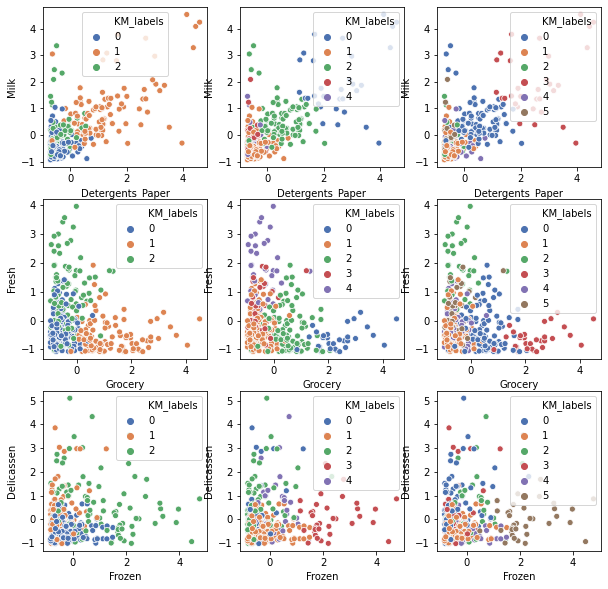

In [72]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=3)

plt.sca(ax[0][0])
sns.scatterplot(data=cus_km, x='Detergents_Paper', y='Milk', hue='KM_labels', palette='deep')
plt.sca(ax[0][1])
sns.scatterplot(data=cus_km_2, x='Detergents_Paper', y='Milk', hue='KM_labels', palette='deep')
plt.sca(ax[0][2])
sns.scatterplot(data=cus_km_3, x='Detergents_Paper', y='Milk', hue='KM_labels', palette='deep')

plt.sca(ax[1][0])
sns.scatterplot(data=cus_km, x='Grocery', y='Fresh', hue='KM_labels', palette='deep')
plt.sca(ax[1][1])
sns.scatterplot(data=cus_km_2, x='Grocery', y='Fresh', hue='KM_labels', palette='deep')
plt.sca(ax[1][2])
sns.scatterplot(data=cus_km_3, x='Grocery', y='Fresh', hue='KM_labels', palette='deep')

plt.sca(ax[2][0])
sns.scatterplot(data=cus_km, x='Frozen', y='Delicassen', hue='KM_labels', palette='deep')
plt.sca(ax[2][1])
sns.scatterplot(data=cus_km_2, x='Frozen', y='Delicassen', hue='KM_labels', palette='deep')
plt.sca(ax[2][2])
sns.scatterplot(data=cus_km_3, x='Frozen', y='Delicassen', hue='KM_labels', palette='deep')
plt.show();

It´s unclear to find out the best option, but the klusters variety seems to different in each value.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [73]:
dbscan = DBSCAN(eps=0.75, min_samples=6).fit(cus_km)
cus_km['DBSCAN_labels'] = dbscan.labels_

In [74]:
dbscan = DBSCAN(eps=0.25, min_samples=7).fit(cus_km_2)
cus_km_2['DBSCAN_labels'] = dbscan.labels_

In [75]:
dbscan = DBSCAN(eps=0.75, min_samples=8).fit(cus_km_3)
cus_km_3['DBSCAN_labels'] = dbscan.labels_

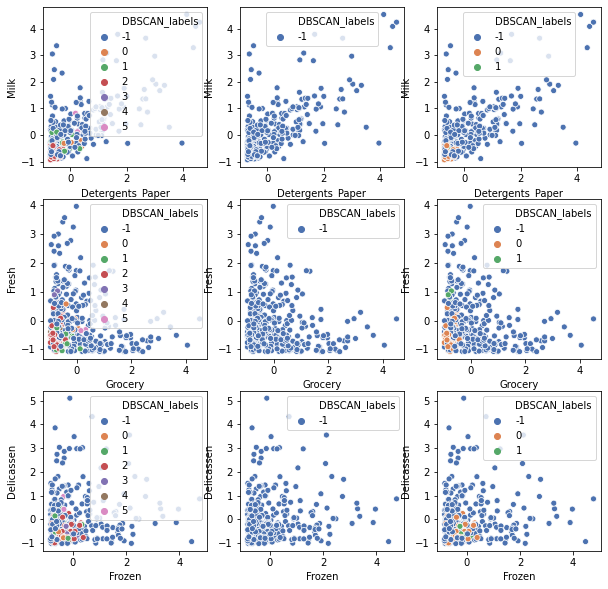

In [76]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=3)

plt.sca(ax[0][0])
sns.scatterplot(data=cus_km, x='Detergents_Paper', y='Milk', hue='DBSCAN_labels', palette='deep')
plt.sca(ax[0][1])
sns.scatterplot(data=cus_km_2, x='Detergents_Paper', y='Milk', hue='DBSCAN_labels', palette='deep')
plt.sca(ax[0][2])
sns.scatterplot(data=cus_km_3, x='Detergents_Paper', y='Milk', hue='DBSCAN_labels', palette='deep')

plt.sca(ax[1][0])
sns.scatterplot(data=cus_km, x='Grocery', y='Fresh', hue='DBSCAN_labels', palette='deep')
plt.sca(ax[1][1])
sns.scatterplot(data=cus_km_2, x='Grocery', y='Fresh', hue='DBSCAN_labels', palette='deep')
plt.sca(ax[1][2])
sns.scatterplot(data=cus_km_3, x='Grocery', y='Fresh', hue='DBSCAN_labels', palette='deep')

plt.sca(ax[2][0])
sns.scatterplot(data=cus_km, x='Frozen', y='Delicassen', hue='DBSCAN_labels', palette='deep')
plt.sca(ax[2][1])
sns.scatterplot(data=cus_km_2, x='Frozen', y='Delicassen', hue='DBSCAN_labels', palette='deep')
plt.sca(ax[2][2])
sns.scatterplot(data=cus_km_3, x='Frozen', y='Delicassen', hue='DBSCAN_labels', palette='deep')

plt.show();

In [27]:
# Your comment here